# Submission 01 -- Exploratory Data Analysis

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%config InlineBackend.figure_format ='retina'

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score

In [4]:
df = pd.read_csv('../datasets/train_clean.csv')

df.shape

(2051, 263)

## First attempt: Throw all columns into a LASSO regression

Our first attempt will be to throw everything into a Lasso Regression. Hopefully, we will also see which parameters have the greatest effect on the target. 

In [5]:
X = df.drop(columns='saleprice')
y = df['saleprice']

X_train, X_test, y_train, y_test = train_test_split(X, y)

### Scale my feature dataframe
We are going to scale our data before fitting our LASSO model.

In [6]:
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


### Fit our Lasso Model 

In [7]:
# Set up a list of Lasso alphas to check.
l_alpha = np.logspace(-3, 10, 100)

# Cross-validate over our list of Lasso alphas.
lasso = LassoCV(alphas=l_alpha, cv=5, max_iter=5000)

# Fit model using best ridge alpha!
lasso.fit(Z_train, y_train)

LassoCV(alphas=array([1.00000e-03, 1.35305e-03, ..., 7.39072e+09, 1.00000e+10]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=5000,
    n_alphas=100, n_jobs=None, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [8]:
lasso.alpha_

811.130830789689

In [9]:
lasso.score(Z_train, y_train)

0.9224362435835176

In [10]:
lasso.score(Z_test, y_test)

0.9194965504111114

### Filter out irrelavant features
We can see that our model has a lot of error due to variance, since our training score is so much higher than our test score.

In a future iteration, we can take out any features that the LASSO regression has given zero coefficients to simplify our model.

### Create submission: `sub01.csv`
Do all the above for the test set to generate predictions.

In [11]:
test = pd.read_csv('../datasets/test_clean.csv')
test.shape

(879, 262)

In [12]:
# Scale the testing data using the standard scaler 
# fit from our training data.
test_trans = ss.transform(test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
# Generate our predictions based of the LassoCV
test['SalePrice'] = lasso.predict(test_trans)

In [14]:
# Rename the id column and store submission.
test[['id','SalePrice']].rename({'id':'Id'},axis=1).to_csv('../submissions/sub_01.csv'
                                                           ,index=False)

### Kaggle Result
- This model scored a 22618.10395 on the Kaggle Leaderboard.

---

# Submission 05 -- Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score

## Second Attempt
Looking at the histogram below, we can see that our target price is not normally distributed. This next model will be similar to the one above, but we will fit the Lasso model to a log transformation of the `saleprice`.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


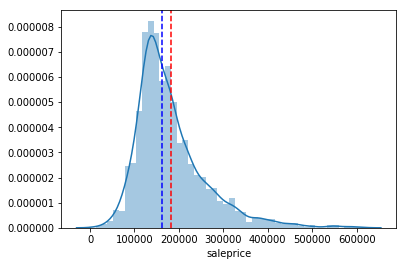

In [15]:
sns.distplot(df['saleprice'])
plt.axvline(df['saleprice'].mean(),c='r',linestyle='--')
plt.axvline(df['saleprice'].median(),c='b',linestyle='--');

In [16]:
# We will do a log1p transformation on saleprice.
# This is possible since all of our prices are positive.
# We will need to undo this transformation when we get our predictions.

X = df.drop(columns='saleprice')
y = np.log1p(df['saleprice'])

X_train, X_test, y_train, y_test = train_test_split(X, y)

### Our data has been normalized, and will be much more manageable in our linear modelling.

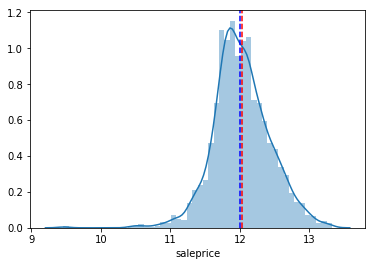

In [17]:
sns.distplot(y)
plt.axvline(y.mean(),c='r',linestyle='--')
plt.axvline(y.median(),c='b',linestyle='--');

In [18]:
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
# Set up a list of Lasso alphas to check.
l_alpha = np.logspace(-3, 10, 100)

# Cross-validate over our list of Lasso alphas.
lasso = LassoCV(alphas=l_alpha, cv=5, max_iter=5000)

# Fit model using best ridge alpha!
lasso.fit(Z_train, y_train)

LassoCV(alphas=array([1.00000e-03, 1.35305e-03, ..., 7.39072e+09, 1.00000e+10]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=5000,
    n_alphas=100, n_jobs=None, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [20]:
lasso.alpha_

0.003351602650938841

In [ ]:
cross_val_score(lasso, Z_train, y_train).mean()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8585082709600586

In [ ]:
lasso.score(Z_train, y_train)

0.9320816015054757

In [ ]:
lasso.score(Z_test, y_test)

0.9160161652834964

### Create submission: `sub02.csv`
We can still see that our model has a lot of error due to variance.

In [ ]:
test = pd.read_csv('../datasets/test_clean.csv')
test.shape

(879, 262)

In [ ]:
test_trans = ss.transform(test)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


#### Be sure to undo the log transformation before saving predicitons.

In [ ]:
test['SalePrice'] = np.expm1(lasso.predict(test_trans))

In [ ]:
test[['id','SalePrice']].rename({'id':'Id'},axis=1).to_csv('../submissions/sub_02.csv'
                                                           ,index=False)

### Kaggle Result
- The model resulted in a score of 20247.86937.  
- A 2,370.23458 point improvement.

---

# Submission 03 -- Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score

## Third Attempt
Using the Lasso coefficients, narrow in on better features.

In [ ]:
# Create a series of column names zipped with their lasso coefficients
coef_list = pd.Series({col:coef for col,coef in zip(X_train.columns,lasso.coef_)})

# Pull the columns that did not have 0 coefficients as my new features.
features = coef_list[abs(round(coef_list,2)) > 0.0].index
features

Index(['lot_area', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'exter_qual', 'bsmt_qual', 'bsmtfin_sf_1',
       'total_bsmt_sf', 'heating_qc', '1st_flr_sf', 'gr_liv_area',
       'bsmt_full_bath', 'kitchen_qual', 'totrms_abvgrd', 'fireplace_qu',
       'garage_yr_blt', 'garage_cars', 'wood_deck_sf', 'screen_porch',
       'ms_zoning_A (agr)', 'ms_zoning_C (all)', 'ms_zoning_FV',
       'ms_zoning_RM', 'neighborhood_Crawfor', 'neighborhood_GrnHill',
       'neighborhood_MeadowV', 'neighborhood_NridgHt', 'neighborhood_Somerst',
       'neighborhood_StoneBr', 'condition_1_Norm', 'bldg_type_1Fam',
       'bldg_type_Twnhs', 'roof_style_Mansard', 'roof_matl_ClyTile',
       'exterior_1st_AsbShng', 'exterior_1st_BrkFace', 'foundation_PConc',
       'bsmt_exposure_Gd', 'bsmtfin_type_1_Unf', 'heating_Grav',
       'central_air_N', 'functional_Maj1', 'functional_Maj2', 'functional_Sal',
       'functional_Sev', 'functional_Typ', 'garage_type_Attchd',
       'paved_dri

### Use `PolynomialFeatures()` to create interaction columns.
Using the list of columns from the submission above, we are going to create polynomial columns and see how they perform.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

### Import Train, Polynomial Transform, Scale and Model

In [ ]:
train = pd.read_csv('../datasets/train_clean.csv')
X = train[features]
y = np.log1p(train['saleprice'])

#### Create Polynomial Features

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

#### Train Test Split the Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y)

#### Scale the data

In [ ]:
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

#### Instantiate and fit model.

In [ ]:
lasso = LassoCV()

In [ ]:
cross_val_score(lasso, Z_train, y_train, cv=5).mean()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

0.8712706170234817

In [ ]:
lasso.fit(Z_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [ ]:
lasso.score(Z_train, y_train)

0.9348766126887255

In [ ]:
lasso.score(Z_test, y_test)

0.878232542201079

### Create submission: `sub03.csv`
Now even more error due to variance. We will see how this model performance on the kaggle and then we will leave the lasso model behind for a bit.

In [ ]:
# Pull clean csv file.
test = pd.read_csv('../datasets/test_clean.csv')

# Pull our features from the testing dataframe.
X = test[features]

# Transform our data
X_poly = poly.transform(X)

# Scale our data
Z_test = ss.transform(X_poly)

# Predict our prices, and convert into interpretable values.
test['SalePrice'] = np.expm1(lasso.predict(Z_test))

# Create csv
test[['id','SalePrice']].rename({'id':'Id'},axis=1).to_csv('../submissions/sub_03.csv'
                                                           ,index=False)

### Kaggle Result
- This model received a score of 21114.99264 on kaggle.
- This is more overfit than the last model and this score is 867.12327 points **worse** than `sub02`.

---

In [ ]:
# Create a series of column names zipped with their lasso coefficients
coef_list = pd.Series({col:coef for col,coef in zip(poly.get_feature_names(features),lasso.coef_)})

# Pull the columns that did not have 0 coefficients as my new features.
features_00 = coef_list[abs(round(coef_list,2)) > 0.0].sort_values(ascending=False)

# Submission 04 -- Exploratory Data Analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df = pd.read_csv('../datasets/train_clean.csv')

df.shape

(2051, 263)

## Fourth Attempt: Leaving the Lasso
Our model is performing, but our lasso is adding an error feature that may be making it worse. Using the data we have from the previous models, we will attempt some more transformations to improve out model, but leave the Lasso model behind.

In [9]:
train = pd.read_csv('../datasets/train_clean.csv')
X = train.drop(columns='saleprice')
y = np.log1p(train['saleprice'])

In [10]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y)

In [12]:
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.fit(X_test)

In [13]:
corr_df = pd.DataFrame(X_poly, columns=poly.get_feature_names(X.columns))
corr_df['saleprice'] = y
corr_df.head()

,1,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,...,sale_type_ConLw sale_type_New,sale_type_ConLw sale_type_Oth,sale_type_ConLw sale_type_WD,sale_type_New^2,sale_type_New sale_type_Oth,sale_type_New sale_type_WD,sale_type_Oth^2,sale_type_Oth sale_type_WD,sale_type_WD ^2,saleprice
0,1.0,109.0,533352170.0,60.0,13517.0,13517.0,6.0,8.0,1976.0,2005.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.779136
1,1.0,544.0,531379050.0,60.0,43.0,11492.0,7.0,5.0,1996.0,1997.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.301387
2,1.0,153.0,535304180.0,20.0,68.0,7922.0,5.0,7.0,1953.0,2007.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.599112
3,1.0,318.0,916386060.0,60.0,73.0,9802.0,5.0,5.0,2006.0,2007.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.066816
4,1.0,255.0,906425045.0,50.0,82.0,14235.0,6.0,8.0,1900.0,1993.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.838633


In [ ]:
plt.figure(figsize=(7,50))
sns.heatmap(np.abs(corr_df.corr()[['saleprice']]).sort_values(by='saleprice',ascending=False)
            ,annot=True
            ,cmap='viridis'
           )

#### Create Polynomial Features

In [ ]:
lr = LinearRegression()
lr.fit(Z_train[coef_list_01.index])

In [ ]:
features

In [ ]:
X = pd.DataFrame(X_poly, columns=poly.get_feature_names(train.columns))

In [ ]:
X[coef]

#### Train Test Split the Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y)

#### Scale the data

In [ ]:
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

#### Instantiate and fit model.

In [ ]:
lasso = LassoCV()

In [ ]:
cross_val_score(lasso, Z_train, y_train, cv=5).mean()

In [ ]:
lasso.fit(Z_train, y_train)

In [ ]:
lasso.score(Z_train, y_train)

In [ ]:
lasso.score(Z_test, y_test)

In [ ]:
train, X, y = fix_data_get_X_y('../datasets/data_fillna.csv',features)
X.head(), y.head()

In [ ]:
lr = LinearRegression()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
cross_val_score(lr, X_train, y_train, cv=5).mean()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
lr.score(X_train,y_train)

In [ ]:
lr.score(X_test,y_test)

In [ ]:
def create_submission(model=lr,feat=features,test_name='sub_04'):
    
    df, X_test, y_test = fix_data_get_X_y('./datasets/test_fillna.csv',feat,model=model,test=True)
    print(X_test.columns)
    df['SalePrice'] = y_test
    submission = df[['Id','SalePrice']]
    
    submission.to_csv(f'./datasets/{test_name}.csv',index=False)
    return submission.shape

In [ ]:
create_submission(lr,features,'sub_04')

In [ ]:
df[['Overall Qual', 'Exter Qual','Gr Liv Area', 'Kitchen Qual','Bsmt Qual']].dtypes

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
poly = PolynomialFeatures(degree=3)

df.select_dtypes(include='number').columns

features = ['Overall Qual', 'Exter Qual', 'Gr Liv Area', 'Kitchen Qual','Bsmt Qual']
X_train = poly.fit_transform(df[features])

print(X_train)

data = pd.DataFrame(X_train,columns=poly.get_feature_names(features))

data['SalePrice'] = df['SalePrice']

plt.figure(figsize=(7,100))
sns.heatmap(data.corr()[['SalePrice']].sort_values(by='SalePrice',ascending=False)
            ,annot=True
            ,cmap='viridis')



In [ ]:
X_train

In [ ]:
X_train.shape

In [ ]:
df['Exter Qual'].value_counts()